# **Google AI4Code**
### **Group 7**
##### **Kavya Gajjar, Dyuthi Vinod**


##### Import necessary Libraries

In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
from scipy import sparse
from tqdm import tqdm
import random

path = Path('../input/AI4Code')

#### The python codes are in json files:
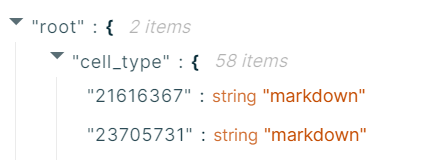)
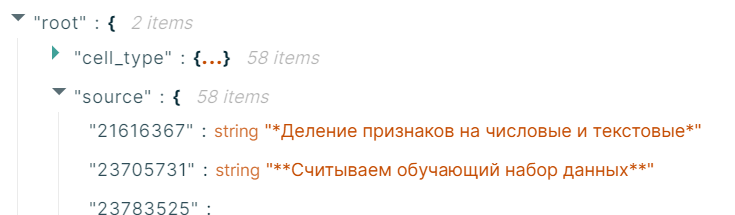

In [2]:
NUM_TRAIN = 100000
def read_notebook(path):
    #######################
    # Read the json files 
    #######################
    return (
        pd.read_json(
            path,
            dtype={'cell_type': 'category', 'source': 'str'})
        .assign(id=path.stem)
        .rename_axis('cell_id')
    )

paths_train = list((path / 'train').glob('*.json'))[:NUM_TRAIN]
notebooks_train = [read_notebook(path) for path in tqdm(paths_train, desc='Train NBs')]

# Convert the train notebooks as a dataframe 
df = (
    pd.concat(notebooks_train)
    .set_index('id', append=True)
    .swaplevel()
    .sort_index(level='id', sort_remaining=False)
)

df


Train NBs: 100%|██████████| 100000/100000 [23:12<00:00, 71.80it/s]


cell_type  \
id             cell_id              
00001756c60be8 1862f0a6      code   
               2a9e43d6      code   
               038b763d      code   
               2eefe0ef      code   
               0beab1cd      code   
...                           ...   
fffe1d764579d5 0d770d6b  markdown   
               d45ddc62  markdown   
               1a63248d  markdown   
               a8ffc8b4  markdown   
               4e2d4c2d  markdown   

                                                                    source  
id             cell_id                                                      
00001756c60be8 1862f0a6  # This Python 3 environment comes with many he...  
               2a9e43d6  import numpy as np\nimport pandas as pd\nimpor...  
               038b763d  import warnings\nwarnings.filterwarnings('igno...  
               2eefe0ef      matplotlib.rcParams.update({'font.size': 14})  
               0beab1cd  def evaluate_preds(train_true_values, train_pr...  
...                                                                    ...  
fffe1d764579d5 0d770d6b                           ## REMOVING THE OUTLIERS  
               d45ddc62                          ### DIMENSIONALITY CURSE   
               1a63248d                # BANGALORE HOUSE PRICE PREDICTION   
               a8ffc8b4  * We have achieved 75.2% accuracy in predictin...  
               4e2d4c2d                                 ## DATA INGESTION   

[4570415 rows x 2 columns]

In [3]:
# Get an example notebook
notebook_id_num = random.randrange(0, NUM_TRAIN, 1)
nb_id = df.index.unique('id')[notebook_id_num]
print('Notebook:', nb_id)

print("The disordered notebook:")
nb = df.loc[nb_id, :]
display(nb)
print()

Notebook: 0c3a1dcf76e52b
The disordered notebook:


,cell_type,source
cell_id,,
4bb875fc,code,# This Python 3 environment comes with many he...
7e6c3fa5,code,# Importing needed libraries\nimport matplotli...
55164ddb,code,# Building model for RGB datasets\n# RGB --> {...
6ba2a4a7,code,# Loading model\nmodel_rgb = load_model('/kagg...
7a13efe1,code,# Plotting model's layers in form of flowchart...
7acafff0,code,# Showing model's summary in form of table\nmo...
723cab36,code,# Showing dropout rate\nprint(model_rgb.layers...
d37383da,code,# Defining lists to collect models in\nmodel_r...
06935983,code,# Showing models' input shapes\nprint(model_rg...


#### The correct cell orders of the training notebooks is stored in train_orders.csv
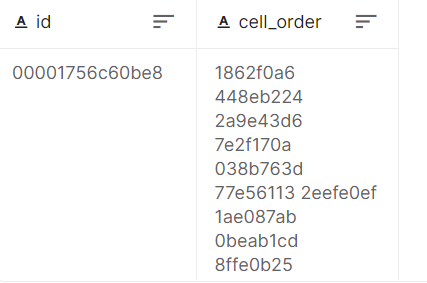

In [4]:
# Read the correct order of notebook cells 
df_orders = pd.read_csv(
    path / 'train_orders.csv',
    index_col='id',
    squeeze=True,
).str.split()  

df_orders.head(2)

id
00001756c60be8    [1862f0a6, 448eb224, 2a9e43d6, 7e2f170a, 038b7...
00015c83e2717b    [2e94bd7a, 3e99dee9, b5e286ea, da4f7550, c4172...
Name: cell_order, dtype: object

In [5]:
# Get the correct order
cell_order = df_orders.loc[nb_id]

print("The ordered notebook:")
nb.loc[cell_order, :]

The ordered notebook:


,cell_type,source
cell_id,,
b22e8010,markdown,# ⛔️ Deep CNN for Traffic signs Classification
c8616234,markdown,"* **Training** deep CNN on **""original""** vers..."
af90cc92,markdown,# 🎓 Related course for classification tasks
97b28fbb,markdown,"**Design**, **Train** & **Test** deep CNN for ..."
92709c78,markdown,# 📥 Importing needed libraries
4bb875fc,code,# This Python 3 environment comes with many he...
7e6c3fa5,code,# Importing needed libraries\nimport matplotli...
fd673ecb,markdown,# ➰ Designing and Saving Deep CNN model
55164ddb,code,# Building model for RGB datasets\n# RGB --> {...


In [6]:
def get_ranks(base, derived):
    #######################
    # Give the ranks as the 
    # positions of the cell
    # order
    #######################
    return [base.index(d) for d in derived]

cell_ranks = get_ranks(cell_order, list(nb.index))
nb.insert(0, 'rank', cell_ranks)

nb

,rank,cell_type,source
cell_id,,,
4bb875fc,5,code,# This Python 3 environment comes with many he...
7e6c3fa5,6,code,# Importing needed libraries\nimport matplotli...
55164ddb,8,code,# Building model for RGB datasets\n# RGB --> {...
6ba2a4a7,10,code,# Loading model\nmodel_rgb = load_model('/kagg...
7a13efe1,11,code,# Plotting model's layers in form of flowchart...
7acafff0,12,code,# Showing model's summary in form of table\nmo...
723cab36,13,code,# Showing dropout rate\nprint(model_rgb.layers...
d37383da,15,code,# Defining lists to collect models in\nmodel_r...
06935983,16,code,# Showing models' input shapes\nprint(model_rg...


In [7]:
# Check if its correct
from pandas.testing import assert_frame_equal

assert_frame_equal(nb.loc[cell_order, :], nb.sort_values('rank'))

In [8]:
df_orders_ = df_orders.to_frame().join(
    df.reset_index('cell_id').groupby('id')['cell_id'].apply(list),
    how='right',
)

ranks = {}
for id_, cell_order, cell_id in df_orders_.itertuples():
    ranks[id_] = {'cell_id': cell_id, 'rank': get_ranks(cell_order, cell_id)}

df_ranks = (
    pd.DataFrame
    .from_dict(ranks, orient='index')
    .rename_axis('id')
    .apply(pd.Series.explode)
    .set_index('cell_id', append=True)
)

df_ranks


rank
id             cell_id      
00001756c60be8 1862f0a6    0
               2a9e43d6    2
               038b763d    4
               2eefe0ef    6
               0beab1cd    8
...                      ...
fffe1d764579d5 0d770d6b   43
               d45ddc62   33
               1a63248d    0
               a8ffc8b4   69
               4e2d4c2d    3

[4570415 rows x 1 columns]

In [9]:
df_ancestors = pd.read_csv(path / 'train_ancestors.csv', index_col='id')
df_ancestors

,ancestor_id,parent_id
id,,
00001756c60be8,945aea18,NaN
00015c83e2717b,aa2da37e,317b65d12af9df
0001bdd4021779,a7711fde,NaN
0001daf4c2c76d,090152ca,NaN
0002115f48f982,272b483a,NaN
...,...,...
fffc30d5a0bc46,6aed207b,NaN
fffc3b44869198,a6aaa8d7,NaN
fffc63ff750064,0a1b5b65,NaN


In [10]:
from sklearn.model_selection import GroupShuffleSplit

NVALID = 0.1  # size of validation set

splitter = GroupShuffleSplit(n_splits=1, test_size=NVALID, random_state=0)

# Split, keeping notebooks with a common origin (ancestor_id) together
ids = df.index.unique('id')
ancestors = df_ancestors.loc[ids, 'ancestor_id']
ids_train, ids_valid = next(splitter.split(ids, groups=ancestors))
ids_train, ids_valid = ids[ids_train], ids[ids_valid]

df_train = df.loc[ids_train, :]
df_valid = df.loc[ids_valid, :]

#### Create the Tf-idf vectors 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Training set
tfidf = TfidfVectorizer(min_df=0.01)
X_train = tfidf.fit_transform(df_train['source'].astype(str))
# Rank of each cell within the notebook
y_train = df_ranks.loc[ids_train].to_numpy()
# Number of cells in each notebook
groups = df_ranks.loc[ids_train].groupby('id').size().to_numpy()

In [12]:
# Add code cell ordering
X_train = sparse.hstack((
    X_train,
    np.where(
        df_train['cell_type'] == 'code',
        df_train.groupby(['id', 'cell_type']).cumcount().to_numpy() + 1,
        0,
    ).reshape(-1, 1)
))
print(X_train.shape)

(4113821, 284)


#### Model using XGBRanker

In [13]:
from xgboost import XGBRanker

model = XGBRanker(
    min_child_weight=10,
    subsample=0.5,
    tree_method='hist',
)
model.fit(X_train, y_train, group=groups)

XGBRanker(base_score=0.5, booster='gbtree', callbacks=None, colsample_bylevel=1,
          colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=None,
          enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
          grow_policy='depthwise', importance_type=None,
          interaction_constraints='', learning_rate=0.300000012, max_bin=256,
          max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
          min_child_weight=10, missing=nan, monotone_constraints='()',
          n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
          random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [14]:
# Validation set
X_valid = tfidf.transform(df_valid['source'].astype(str))
# The metric uses cell ids
y_valid = df_orders.loc[ids_valid]

X_valid = sparse.hstack((
    X_valid,
    np.where(
        df_valid['cell_type'] == 'code',
        df_valid.groupby(['id', 'cell_type']).cumcount().to_numpy() + 1,
        0,
    ).reshape(-1, 1)
))

In [15]:
y_pred = pd.DataFrame({'rank': model.predict(X_valid)}, index=df_valid.index)
y_pred = (
    y_pred
    .sort_values(['id', 'rank'])  # Sort the cells in each notebook by their rank.
                                  # The cell_ids are now in the order the model predicted.
    .reset_index('cell_id')  # Convert the cell_id index into a column.
    .groupby('id')['cell_id'].apply(list)  # Group the cell_ids for each notebook into a list.
)
y_pred.head(10)

id
000a4651cce8f4    [9ae35818, f1dee85b, 00e71412, 5bcfa9ad, f417b...
0012c5ac5df603    [968fdb0e, 4870c694, d6dba190, a9680fb9, d6dfc...
0013a8634c4d8a    [c289aa69, a90dd013, 663637c5, a37d3620, 8fc13...
0017062cc1b4ca    [686d3046, da7c4ef9, 151c1203, 24317e49, 171af...
00188ba74fbff0    [9ebfe7ac, bc09b855, b3b7c9b3, b2c1746f, e62d9...
0020e93727e09c    [2ae0558f, c99eb39c, 0395ecde, 3de50426, f7501...
0024f1aef140c8    [c8192130, e0652636, ffc28692, ce79ba4d, 9fe1c...
002bbeec78c962    [91ab0503, 4c0d6a2a, febd4424, 3f0150f5, 3b666...
003e940df438fb    [3e980293, 80690371, 602bbf0a, 218f15c3, 8ecd7...
004747662ff100    [65b0a1b4, 2717a0b9, 2321daff, 0ef8b361, bbeac...
Name: cell_id, dtype: object

In [16]:
nb_id = df_valid.index.get_level_values('id').unique()[8]

display(df.loc[nb_id])
display(df.loc[nb_id].loc[y_pred.loc[nb_id]])

,cell_type,source
cell_id,,
3e980293,code,import numpy as np\nimport pandas as pd\nimpor...
80690371,code,df = pd.read_csv('../input/titanic/train.csv')...
602bbf0a,code,df.shape
218f15c3,code,df.isna().sum()
8ecd7f60,code,df.columns
a0f325da,code,"col_to_use = ['Pclass','Age','Fare','Survived'..."
e5e925cc,code,df_copy.head()
9341d57c,code,df_copy.isna().sum()
059c3a3c,code,"df_copy['Age'].fillna(df_copy.Age.median(), in..."


,cell_type,source
cell_id,,
3e980293,code,import numpy as np\nimport pandas as pd\nimpor...
80690371,code,df = pd.read_csv('../input/titanic/train.csv')...
602bbf0a,code,df.shape
218f15c3,code,df.isna().sum()
8ecd7f60,code,df.columns
a0f325da,code,"col_to_use = ['Pclass','Age','Fare','Survived'..."
e5e925cc,code,df_copy.head()
9341d57c,code,df_copy.isna().sum()
059c3a3c,code,"df_copy['Age'].fillna(df_copy.Age.median(), in..."


In [17]:
from bisect import bisect


def count_inversions(a):
    inversions = 0
    sorted_so_far = []
    for i, u in enumerate(a):
        j = bisect(sorted_so_far, u)
        inversions += i - j
        sorted_so_far.insert(j, u)
    return inversions


def kendall_tau(ground_truth, predictions):
    total_inversions = 0
    total_2max = 0  # twice the maximum possible inversions across all instances
    for gt, pred in zip(ground_truth, predictions):
        ranks = [gt.index(x) for x in pred]  # rank predicted order in terms of ground truth
        total_inversions += count_inversions(ranks)
        n = len(gt)
        total_2max += n * (n - 1)
    return 1 - 4 * total_inversions / total_2max

In [18]:
y_dummy = df_valid.reset_index('cell_id').groupby('id')['cell_id'].apply(list)
kendall_tau(y_valid, y_dummy)

0.4056650789827768

In [19]:
kendall_tau(y_valid, y_pred)

0.5912061659517922

In [20]:
paths_test = list((path / 'test').glob('*.json'))
notebooks_test = [
    read_notebook(path) for path in tqdm(paths_test, desc='Test NBs')
]
df_test = (
    pd.concat(notebooks_test)
    .set_index('id', append=True)
    .swaplevel()
    .sort_index(level='id', sort_remaining=False)
)

Test NBs: 100%|██████████| 4/4 [00:00<00:00, 68.24it/s]


In [21]:
X_test = tfidf.transform(df_test['source'].astype(str))
X_test = sparse.hstack((
    X_test,
    np.where(
        df_test['cell_type'] == 'code',
        df_test.groupby(['id', 'cell_type']).cumcount().to_numpy() + 1,
        0,
    ).reshape(-1, 1)
))

In [22]:
y_infer = pd.DataFrame({'rank': model.predict(X_test)}, index=df_test.index)
y_infer = y_infer.sort_values(['id', 'rank']).reset_index('cell_id').groupby('id')['cell_id'].apply(list)
y_infer

id
0009d135ece78d    [ddfd239c, c6cd22db, 1372ae9b, 7f388a41, 90ed0...
0010483c12ba9b    [54c7cab3, fe66203e, 7844d5f8, 7f270e34, 5ce88...
0010a919d60e4f    [aafc3d23, 80e077ec, b7578789, b190ebb4, ed415...
0028856e09c5b7             [012c9d02, eb293dfc, d22526d1, 3ae7ece3]
Name: cell_id, dtype: object

In [23]:
y_sample = pd.read_csv(path / 'sample_submission.csv', index_col='id', squeeze=True)
y_sample

id
0009d135ece78d    ddfd239c c6cd22db 1372ae9b 90ed07ab 7f388a41 2...
0010483c12ba9b    54c7cab3 fe66203e 7844d5f8 5ce8863c 4a0777c4 4...
0010a919d60e4f    aafc3d23 80e077ec b190ebb4 ed415c3c 322850af c...
0028856e09c5b7                  012c9d02 d22526d1 3ae7ece3 eb293dfc
Name: cell_order, dtype: object

In [24]:
y_submit = (
    y_infer
    .apply(' '.join)  # list of ids -> string of ids
    .rename_axis('id')
    .rename('cell_order')
)
y_submit

id
0009d135ece78d    ddfd239c c6cd22db 1372ae9b 7f388a41 90ed07ab 2...
0010483c12ba9b    54c7cab3 fe66203e 7844d5f8 7f270e34 5ce8863c 4...
0010a919d60e4f    aafc3d23 80e077ec b7578789 b190ebb4 ed415c3c 3...
0028856e09c5b7                  012c9d02 eb293dfc d22526d1 3ae7ece3
Name: cell_order, dtype: object

In [25]:
y_submit.to_csv('submission.csv')